a benchmark test in my laptop

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              4
On-line CPU(s) list: 0-3
Thread(s) per core:  2
Core(s) per socket:  2
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               142
Model name:          Intel(R) Core(TM) i5-7200U CPU @ 2.50GHz


In [1]:
import numpy as np
import time

In [2]:
import matplotlib.pyplot as plt
from pystem.stemsegmentation import segmentationSTEM

In [3]:
image = np.load('CuGB.npy')

([], <a list of 0 Text yticklabel objects>)

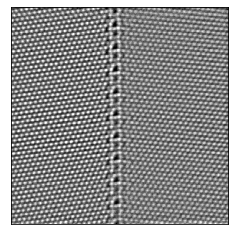

In [4]:
plt.imshow(image[:,:],cmap='gray')
plt.xticks([])
plt.yticks([])

In [5]:
step = 5

In [6]:
image.shape

(1024, 1024)

In [ ]:
descriptor_name = 'local_correlation_map'
seg = segmentationSTEM( n_patterns=3,
                       window_x=20,window_y=20,
                       patch_x=20,patch_y=20,
                       step=step,
                       descriptor_name=descriptor_name,
                       method='fft',
                       upsampling=True)
start = time.time()
labels = seg.perform_clustering(image)
print ('time_cost: %6.2f[s]' %(time.time()-start,))

In [11]:
labels.shape

(1024, 1024)

In [12]:
labels

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)

In [14]:
seg._descriptors.shape

(189, 189, 81)

In [17]:
seg._PCA_components.shape

(189, 189, 5)

In [8]:
seg._descriptors.shape

(189, 189, 81)

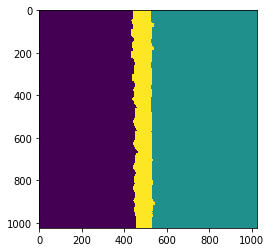

In [11]:
plt.imshow(labels)

In [12]:
descriptor_name = 'power_spectrum'
seg = segmentationSTEM( n_patterns=3,
                       window_x=20,window_y=20,
                       step=step,
                       descriptor_name=descriptor_name,
                       upsampling=True)
start = time.time()
labels = seg.perform_clustering(image)
print ('time_cost: %6.2f[s]' %(time.time()-start,))

time_cost:  14.53[s]


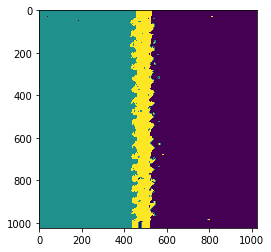

In [13]:
plt.imshow(labels)

In [20]:
descriptor_name = 'reflection_symmetry_maximums'
seg = segmentationSTEM(n_patterns=2,
                       window_x=20,window_y=20,
                       radius=20,
                       step=step,
                       descriptor_name=descriptor_name,
                       upsampling=True)
start = time.time()
labels = seg.perform_clustering(image)
print ('time_cost: %6.2f[s]' %(time.time()-start,))

time_cost:  94.19[s]


([], <a list of 0 Text yticklabel objects>)

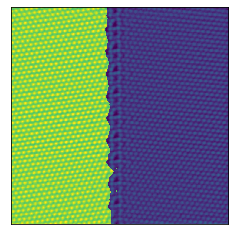

In [26]:
plt.imshow(0.5*image + labels)
plt.xticks([])
plt.yticks([])

In [28]:
descriptor_name = 'rotational_symmetry_maximums'
seg = segmentationSTEM( n_patterns=2,   #       rotational symmetry can only differentiate the grain boundary and the matrix
                       window_x=20,window_y=20,
                       radius=20,
                       step=step,
                       descriptor_name=descriptor_name,
                       num_max=20,
                       upsampling=True)
start = time.time()
labels = seg.perform_clustering(image)
print ('time_cost: %6.2f[s]' %(time.time()-start,))

time_cost:  98.28[s]


([], <a list of 0 Text yticklabel objects>)

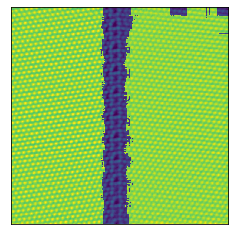

In [30]:
plt.imshow(0.5*image + labels)
plt.xticks([])
plt.yticks([])